Найти $u(0.5,0.5)$ путем численного решения уранения теплопроводности $u_t = u_{xx} + t * sh(x)$, $u(x,0) = 0$, $u(o,t) = 2t$, $u(1,t) = 3t^2$ в области $(x,t)$ $\epsilon$ $[0,1] \times [0,0.5]$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def default_line(x,t):
    if t == 0:
        return 0
    if x == 0:
        return 2 * t
    if x == 1:
        return 3 * t * t
    return 0

In [3]:
def dop_func(x,t):
    return t * (np.exp(x) - np.exp(-x))/2

In [4]:
def create_matr(nx, x = 1, t = 0.5):
    
    h = x/nx
    nt = int(np.ceil(t/(h*h/2)))
    
    s = t/nt
    
    q = s/(h*h)
    
    hx = np.linspace(0,x,nx)
    ht = np.linspace(0,t,nt)
    
    matr = np.zeros((nt,nx))
    return [matr,hx,ht, q,s]

In [5]:
def fulling_matr(matr,hx,ht,q,s):
    for i in range(len(ht)):
        for j in range(len(hx)):
            if (hx[j] == 0) or (hx[j] == 1) or (ht[i] == 0):
                matr[i,j] = default_line(hx[j], ht[i])
            else:
                matr[i,j] = q * matr[i-1, j-1] + (1 - 2 * q) * matr[i-1, j] + q * matr[i-1, j+1] + s*dop_func(hx[j], ht[i])
    return matr

In [6]:
def get_temp(matr):    
    return matr[matr.shape[0]-1, int((matr.shape[1] - 1)/2) + 1]

In [7]:
def solve(n):
    matr,hx,ht,q,s = create_matr(n)
    matr = fulling_matr(matr,hx,ht,q,s)
    return [get_temp(matr),matr, len(hx)]

In [8]:
def print_m_2(matr,a = 7):
    plt.figure(figsize=(2*a,a))
    plt.imshow(matr, interpolation='nearest', aspect='auto')
    plt.set_cmap('hot')
    #plt.savefig("frame.png")
    plt.show()

In [9]:
m = []
ran = range(3,100,2)
for i in ran:
    r = solve(i)
    m.append(r[0])

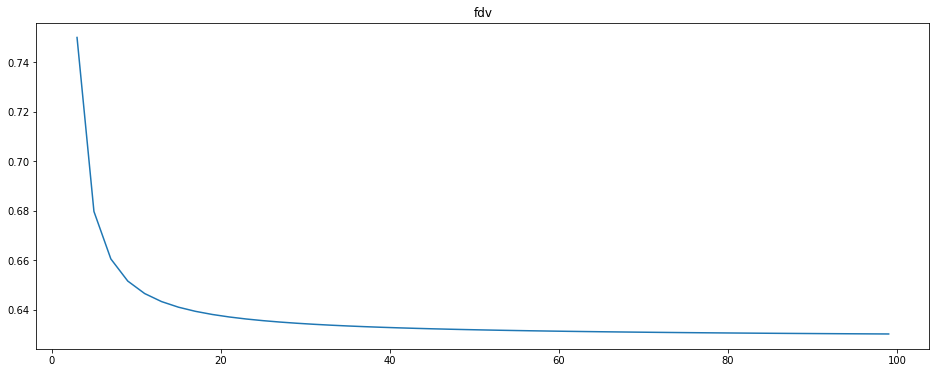

In [10]:
fig4, ax4 = plt.subplots()
ax4.plot(ran, m)
fig4.set_figwidth(16)
fig4.set_figheight(6)
ax4.title.set_text('fdv')

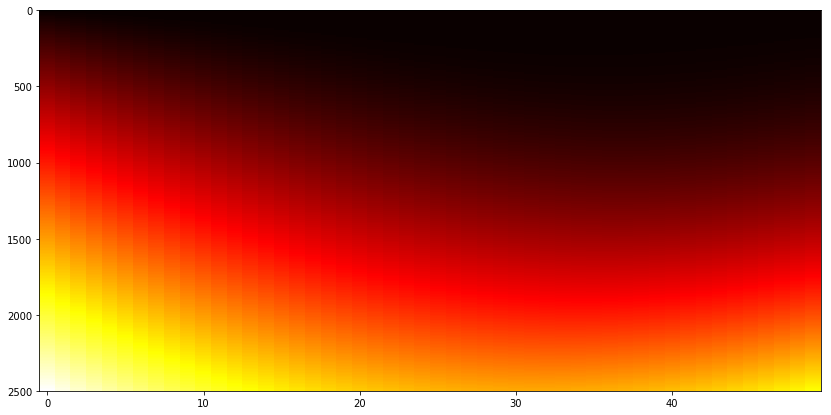

In [11]:
r = solve(50)
print_m_2(r[1])